<a href="https://colab.research.google.com/github/pritul2/ML_practice/blob/master/Malaria_cell_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [170]:
!wget ftp://lhcftp.nlm.nih.gov/Open-Access-Datasets/Malaria/cell_images.zip

--2020-03-02 12:01:14--  ftp://lhcftp.nlm.nih.gov/Open-Access-Datasets/Malaria/cell_images.zip
           => ‘cell_images.zip.1’
Resolving lhcftp.nlm.nih.gov (lhcftp.nlm.nih.gov)... 130.14.55.35, 2607:f220:41e:7055::35
Connecting to lhcftp.nlm.nih.gov (lhcftp.nlm.nih.gov)|130.14.55.35|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /Open-Access-Datasets/Malaria ... done.
==> SIZE cell_images.zip ... 353452851
==> PASV ... done.    ==> RETR cell_images.zip ... done.
Length: 353452851 (337M) (unauthoritative)

cell_images.zip.1    30%[=====>              ] 103.66M  31.9MB/s    eta 9s     ^C


In [171]:
!unzip /content/cell_images.zip

Archive:  /content/cell_images.zip
replace cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [0]:
import os
infected = os.listdir('/content/cell_images/Parasitized/') 
uninfected = os.listdir('/content/cell_images/Uninfected/')

In [0]:
import matplotlib.pyplot as plt
import cv2
IMAGE_SIZE = 64
dataset = []
label = []
for i in infected:
  try:
    img = cv2.imread("/content/cell_images/Parasitized/"+i)
    dataset.append(cv2.resize(img,(IMAGE_SIZE,IMAGE_SIZE)))
    label.append(1)
  except:
    break
for i in uninfected:
  try:
    img = cv2.imread("/content/cell_images/Uninfected/"+i)
    dataset.append(cv2.resize(img,(IMAGE_SIZE,IMAGE_SIZE)))
    label.append(0)
  except:
    break

In [0]:

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,BatchNormalization,Dropout,Flatten,Dense,AveragePooling2D
import os
import tensorflow as tf
os.environ['KERAS_BACKEND']='tensorflow'

keras.backend.get_session().run(tf.local_variables_initializer())
model = None
model = Sequential()

for i in range(2): #2 CNN layers#
	model.add(Conv2D(32,(3,3),padding = "same",data_format="channels_last",activation="relu",input_shape=(IMAGE_SIZE,IMAGE_SIZE,3)))
	model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding="same",data_format="channels_last"))
	model.add(BatchNormalization()) #Using all default values#
	model.add(Dropout(rate=0.1)) #20% probability#

#Adding Dense Layers#
model.add(Flatten())

model.add(Dense(512,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(rate=0.2))

model.add(Dense(256,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(rate=0.2))

model.add(Dense(2,activation="softmax"))
#model.add(BatchNormalization())
#model.add(Dropout(rate=0.2))

model.compile("adam", "categorical_crossentropy",metrics=['accuracy'])

In [175]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_65 (Conv2D)           (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_88 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
dropout_121 (Dropout)        (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_58 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
batch_normalization_89 (Batc (None, 16, 16, 32)      

In [176]:
dataset = np.array(dataset)
label = np.array(label)
print(dataset.shape)
print(label.shape)

(16983, 64, 64, 3)
(16983,)


In [177]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
trainX,testX,trainY,testY = train_test_split(dataset,to_categorical((label)),train_size=0.6)
print(trainX.shape)
print(testX.shape)

(10189, 64, 64, 3)
(6794, 64, 64, 3)


In [179]:
import numpy as np
from keras.callbacks import LearningRateScheduler, ModelCheckpoint
weight_saver = ModelCheckpoint('malaria.h5', monitor='val_dice_coef', 
                                              save_best_only=True, save_weights_only=True)
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.8 ** x)
hist = model.fit(trainX,trainY, batch_size=100, epochs=50,verbose=1)

Epoch 1/50
10189/10189 [==============================] - 8s 781us/step - loss: 0.6838 - acc: 0.6826
Epoch 2/50
10189/10189 [==============================] - 2s 166us/step - loss: 0.3276 - acc: 0.8635
Epoch 3/50
10189/10189 [==============================] - 2s 177us/step - loss: 0.2379 - acc: 0.9091
Epoch 4/50
10189/10189 [==============================] - 2s 178us/step - loss: 0.1908 - acc: 0.9290
Epoch 5/50
10189/10189 [==============================] - 2s 164us/step - loss: 0.1594 - acc: 0.9433
Epoch 6/50
10189/10189 [==============================] - 2s 168us/step - loss: 0.1367 - acc: 0.9493
Epoch 7/50
10189/10189 [==============================] - 2s 170us/step - loss: 0.1209 - acc: 0.9557
Epoch 8/50
10189/10189 [==============================] - 2s 168us/step - loss: 0.0978 - acc: 0.9633
Epoch 9/50
10189/10189 [==============================] - 2s 169us/step - loss: 0.0809 - acc: 0.9709
Epoch 10/50
10189/10189 [==============================] - 2s 165us/step - loss: 0.0665 - a

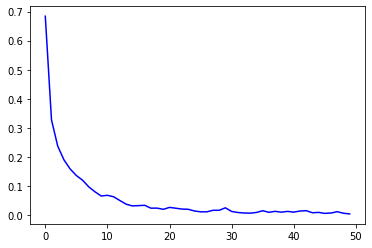

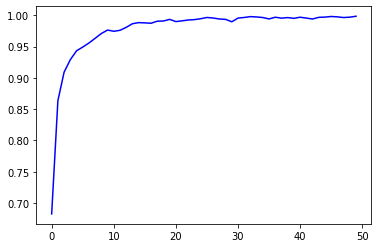

In [185]:
plt.plot(hist.history['loss'], color='b')
plt.show()
plt.plot(hist.history['acc'], color='b')